In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [110]:
#filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv("data 4.5.csv",parse_dates=['Date'], index_col='Date')
print(df.shape)  # (123, 8)
df.tail()

(395, 11)


,price,google trends,tweets,Avg_mining_difficulty,Transactions,marketcap,hashrate,unique_address,Avg_blocksize,Avg_block_time,mining_profitability
Date,,,,,,,,,,,
2022-04-26,0.152,6.330,38760,7146590,29920,20407933295,4.840000e+14,42393,14923,1.072,4.237
2022-04-27,0.140,3.186,29882,6913651,24304,18806072932,4.640000e+14,37217,9936,1.070,4.072
2022-04-28,0.139,2.428,27004,7201295,20978,18675209637,4.860000e+14,35610,9283,1.068,3.868
2022-04-29,0.138,2.357,18322,7186721,22918,18528190033,4.872650e+14,37480,11705,1.065,3.839
2022-04-30,0.134,1.710,12537,7293396,21639,17976843840,4.960000e+14,34202,9022,1.062,3.672


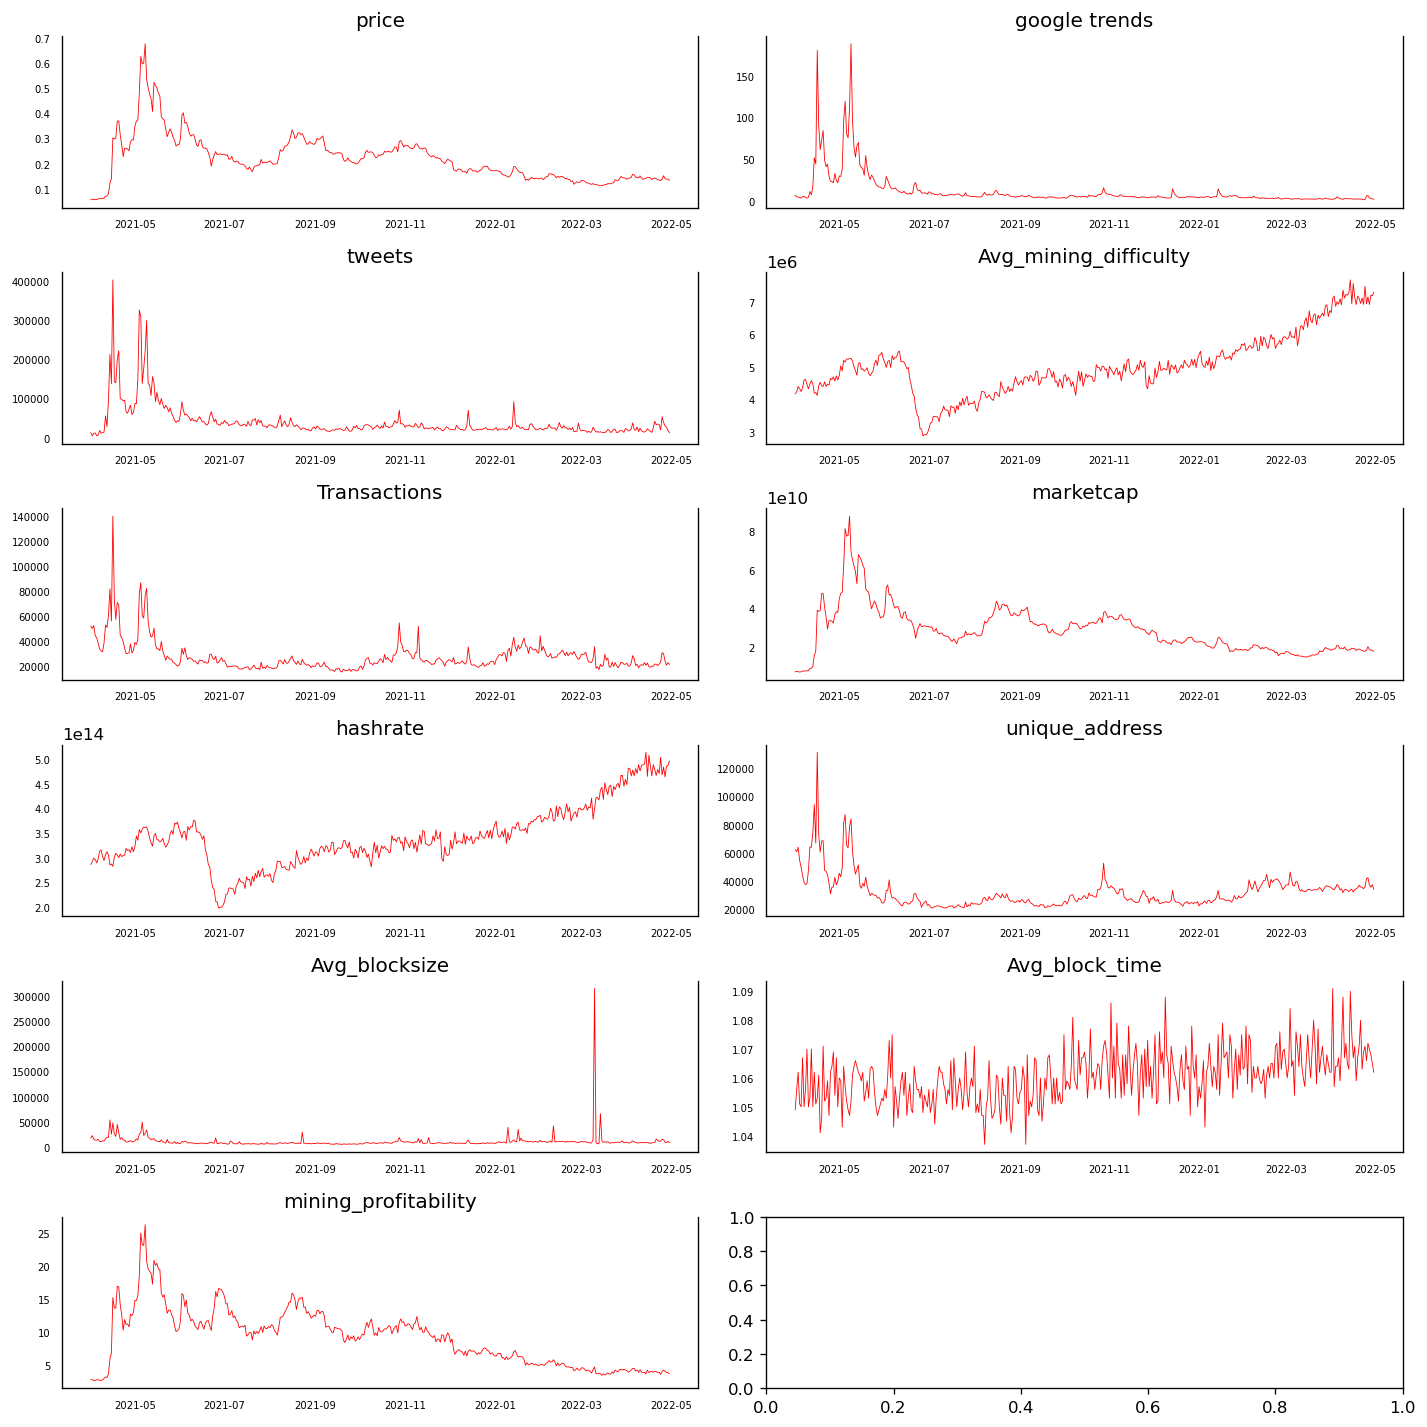

In [111]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,12))
for i, ax in enumerate(axes.flatten()):
    try:
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=0.5)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    except:
        break
    

plt.tight_layout();

In [112]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

/Users/liuweichen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/liuweichen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/Users/liuweichen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/liuweichen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/liuweichen/opt/anaconda3/lib/pytho

,price_x,google trends_x,tweets_x,Avg_mining_difficulty_x,Transactions_x,marketcap_x,hashrate_x,unique_address_x,Avg_blocksize_x,Avg_block_time_x,mining_profitability_x
price_y,1.0000,0.0006,0.0000,0.1663,0.0003,0.0050,1.0000,0.0000,0.6613,0.0647,0.0970
google trends_y,0.0000,1.0000,0.0000,0.3938,0.0000,0.0000,0.8948,0.0000,0.3578,0.0063,0.0001
tweets_y,0.0220,0.0000,1.0000,0.3187,0.0000,0.0280,0.9641,0.0000,0.6481,0.0047,0.0649
Avg_mining_difficulty_y,0.2816,0.3646,0.5896,1.0000,0.4514,0.2898,0.0273,0.4636,0.0410,0.0094,0.4532
Transactions_y,0.0625,0.0005,0.0002,0.3269,1.0000,0.0580,0.8886,0.0000,0.0418,0.0345,0.1231
marketcap_y,0.0050,0.0006,0.0000,0.1678,0.0003,1.0000,0.9971,0.0000,0.6693,0.0643,0.0890
hashrate_y,1.0000,0.5314,0.5735,0.0623,0.2985,0.4544,1.0000,0.2814,0.0475,1.0000,0.4102
unique_address_y,0.0541,0.0000,0.0004,0.2118,0.0001,0.0497,0.5486,1.0000,0.4658,0.0436,0.0474
Avg_blocksize_y,0.1193,0.0023,0.0005,0.0013,0.0000,0.1168,0.0010,0.0000,1.0000,0.1039,0.0485
Avg_block_time_y,0.0000,0.0157,0.0070,0.0000,0.0102,0.0000,1.0000,0.0250,0.1014,1.0000,0.0000


In [113]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
price  ::  363.25    > 263.2603  =>   True
google trends ::  264.38    > 219.4051  =>   True
tweets ::  201.19    > 179.5199  =>   True
Avg_mining_difficulty ::  144.14    > 143.6691  =>   True
Transactions ::  95.54     > 111.7797  =>   False
marketcap ::  57.15     > 83.9383   =>   False
hashrate ::  31.22     > 60.0627   =>   False
unique_address ::  18.05     > 40.1749   =>   False
Avg_blocksize ::  8.02      > 24.2761   =>   False
Avg_block_time ::  0.72      > 12.3212   =>   False
mining_profitability ::  0.0       > 4.1296    =>   False


In [114]:
nobs = 20
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(375, 11)
(20, 11)


In [115]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [116]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1077
 No. Lags Chosen       = 16
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.2414. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "google trends" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.058
 No. Lags Chosen       = 17
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.2617. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "tweets" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [117]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [118]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9591
 No. Lags Chosen       = 17
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "google trends" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.1451
 No. Lags Chosen       = 16
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tweets" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lev

In [93]:
# 2nd difference
df_differenced = df_train.diff().dropna()

In [72]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.923
 No. Lags Chosen       = 0
 Critical value 1%     = -3.518
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7934
 No. Lags Chosen       = 3
 Critical value 1%     = -3.522
 Critical value 5%     = -2.901
 Critical value 10%    = -2.588
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [119]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  171.42630839005724
BIC :  172.8141055787784
FPE :  2.8158265588294353e+74
HQIC:  171.9773839989328 

Lag Order = 2
AIC :  171.29537032849552
BIC :  173.9606395358372
FPE :  2.47393663892037e+74
HQIC:  172.35382110468785 

Lag Order = 3
AIC :  171.111476025225
BIC :  175.05934548995594
FPE :  2.0664912923109307e+74
HQIC:  172.67944269707456 

Lag Order = 4
AIC :  171.27427502721002
BIC :  176.50990742664501
FPE :  2.450492897280322e+74
HQIC:  173.35391285738942 

Lag Order = 5
AIC :  171.1175543821335
BIC :  177.64614715375671
FPE :  2.1217683646733762e+74
HQIC:  173.71103330278584 

Lag Order = 6
AIC :  171.19755879230124
BIC :  179.02434445923197
FPE :  2.3429728174809575e+74
HQIC:  174.30706354176985 

Lag Order = 7
AIC :  171.49115819438393
BIC :  180.6214046947404
FPE :  3.2292035523694134e+74
HQIC:  175.11888845555606 

Lag Order = 8
AIC :  171.80115943066102
BIC :  182.24017045087945
FPE :  4.568636554910389e+74
HQIC:  175.94932997094827 

Lag Order = 9
AIC :

/Users/liuweichen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [120]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,172.9,173.0,1.244e+75,173.0
1,171.3,172.8*,2.568e+74,171.9*
2,171.2,173.9,2.232e+74,172.3
3,171.0,175.0,1.832e+74,172.6
4,171.1,176.5,2.161e+74,173.3
5,170.9*,177.6,1.795e+74*,173.6
6,171.1,179.0,2.106e+74,174.2
7,171.3,180.5,2.652e+74,175.0
8,171.6,182.1,3.606e+74,175.7
9,171.8,183.6,4.680e+74,176.5


In [121]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Apr, 2023
Time:                     19:52:33
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    177.646
Nobs:                     369.000    HQIC:                   173.711
Log likelihood:          -36714.7    FPE:                2.12177e+74
AIC:                      171.118    Det(Omega_mle):     4.48446e+73
--------------------------------------------------------------------
Results for equation price
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.000201         0.000968           -0.208           0.835
L1.price                         0.000021         2.772460            0.000           1.000
L1.google trends

In [122]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

price : 1.98
google trends : 2.13
tweets : 2.07
Avg_mining_difficulty : 1.97
Transactions : 2.06
marketcap : 1.98
hashrate : 1.97
unique_address : 2.04
Avg_blocksize : 2.01
Avg_block_time : 2.93
mining_profitability : 1.95


In [123]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[-3.00000000e-03, -1.41300000e+00, -1.70760000e+04,
        -7.76270000e+04, -2.37200000e+03, -4.38395939e+08,
        -1.20000000e+13, -1.35400000e+03, -1.78100000e+03,
         3.00000000e-03,  0.00000000e+00],
       [-1.00000000e-02, -9.13000000e-01, -1.78900000e+03,
         1.66518000e+05, -5.61900000e+03, -1.34205209e+09,
         1.50000000e+13, -2.55100000e+03, -1.63700000e+03,
        -8.00000000e-03, -3.92000000e-01],
       [ 2.00000000e-03, -1.66000000e-01,  8.25500000e+03,
        -1.80687000e+05,  1.04000000e+03,  3.80325102e+08,
        -1.00000000e+13,  8.10000000e+02, -3.18000000e+02,
         1.20000000e-02,  1.26000000e-01],
       [-4.00000000e-03, -6.10000000e-01, -1.20840000e+04,
         4.49129000e+05, -2.91400000e+03, -5.68863437e+08,
         1.80000000e+13, -2.78000000e+03, -6.16000000e+02,
         1.70000000e-02, -3.45000000e-01],
       [ 8.00000000e-03,  1.21200000e+00,  9.16500000e+03,
        -2.41651000e+05,  2.09800000e+03,  1.05664921e+09,
  

In [124]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,price_1d,google trends_1d,tweets_1d,Avg_mining_difficulty_1d,Transactions_1d,marketcap_1d,hashrate_1d,unique_address_1d,Avg_blocksize_1d,Avg_block_time_1d,mining_profitability_1d
Date,,,,,,,,,,,
2022-04-11,0.002896,-11.909474,-20254.203669,-160110.165970,-4545.989315,3.807301e+08,-6.751423e+12,-6531.641374,20825.563317,-0.013815,0.638323
2022-04-12,0.010271,3.936524,7392.195115,133072.983215,3392.824362,1.348069e+09,9.951934e+12,4082.413478,-29625.179006,0.003769,-0.088643
2022-04-13,0.003213,5.383884,13078.708419,37428.330610,2600.223141,3.804307e+08,3.544761e+11,3810.104183,-577.595093,0.004583,0.193328
2022-04-14,0.007437,-2.355911,-8390.952458,-43131.208737,-92.080031,9.818713e+08,-2.727739e+12,-581.621915,9806.750885,-0.002659,0.304719
2022-04-15,-0.014489,2.480362,3626.284947,88423.826821,-1537.344958,-1.870943e+09,5.421064e+12,-1473.529891,14547.771786,0.002921,-0.706246
2022-04-16,0.002051,-2.182243,-220.887712,-33633.928431,85.109799,2.702055e+08,-1.686297e+12,665.945935,-13756.124436,-0.001572,0.163437
2022-04-17,0.000188,4.991482,8609.314188,-15925.493250,940.160620,2.190191e+07,-1.664874e+12,670.516777,-3466.648866,0.002146,0.006738
2022-04-18,0.005758,-0.612958,-6023.498550,11564.672008,159.818315,7.495342e+08,1.408639e+12,-444.269797,2294.667721,-0.003504,0.270589
2022-04-19,-0.005598,-2.806057,-3417.777486,14809.696358,-1191.857653,-7.183610e+08,1.180691e+12,-1141.427183,2349.629341,0.000642,-0.227782


In [125]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [126]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results.loc[:, ['price_forecast', 'google trends_forecast','tweets_forecast','Avg_mining_difficulty_forecast',
                   'Transactions_forecast','unique_address_forecast','mining_profitability_forecast',
                   'marketcap_forecast','hashrate_forecast','Avg_blocksize_forecast','Avg_block_time_forecast']]

,price_forecast,google trends_forecast,tweets_forecast,Avg_mining_difficulty_forecast,Transactions_forecast,unique_address_forecast,mining_profitability_forecast,marketcap_forecast,hashrate_forecast,Avg_blocksize_forecast,Avg_block_time_forecast
Date,,,,,,,,,,,
2022-04-11,0.153896,-9.119474,4122.796331,6.953121e+06,16276.010685,27294.358626,4.930323,2.060640e+10,4.692486e+14,30147.563317,1.053185
2022-04-12,0.164167,-5.182950,11514.991446,7.086194e+06,19668.835047,31376.772103,4.841680,2.195447e+10,4.792005e+14,522.384311,1.056953
2022-04-13,0.167380,0.200934,24593.699865,7.123622e+06,22269.058188,35186.876287,5.035007,2.233490e+10,4.795550e+14,-55.210782,1.061536
2022-04-14,0.174817,-2.154977,16202.747408,7.080491e+06,22176.978158,34605.254372,5.339727,2.331677e+10,4.768272e+14,9751.540104,1.058877
2022-04-15,0.160328,0.325385,19829.032355,7.168915e+06,20639.633199,33131.724481,4.633481,2.144583e+10,4.822483e+14,24299.311889,1.061798
2022-04-16,0.162379,-1.856857,19608.144643,7.135281e+06,20724.742998,33797.670416,4.796918,2.171604e+10,4.805620e+14,10543.187453,1.060225
2022-04-17,0.162567,3.134625,28217.458830,7.119355e+06,21664.903618,34468.187194,4.803656,2.173794e+10,4.788971e+14,7076.538587,1.062371
2022-04-18,0.168325,2.521667,22193.960280,7.130920e+06,21824.721934,34023.917396,5.074244,2.248747e+10,4.803058e+14,9371.206308,1.058867
2022-04-19,0.162726,-0.284390,18776.182794,7.145730e+06,20632.864281,32882.490214,4.846462,2.176911e+10,4.814865e+14,11720.835648,1.059509


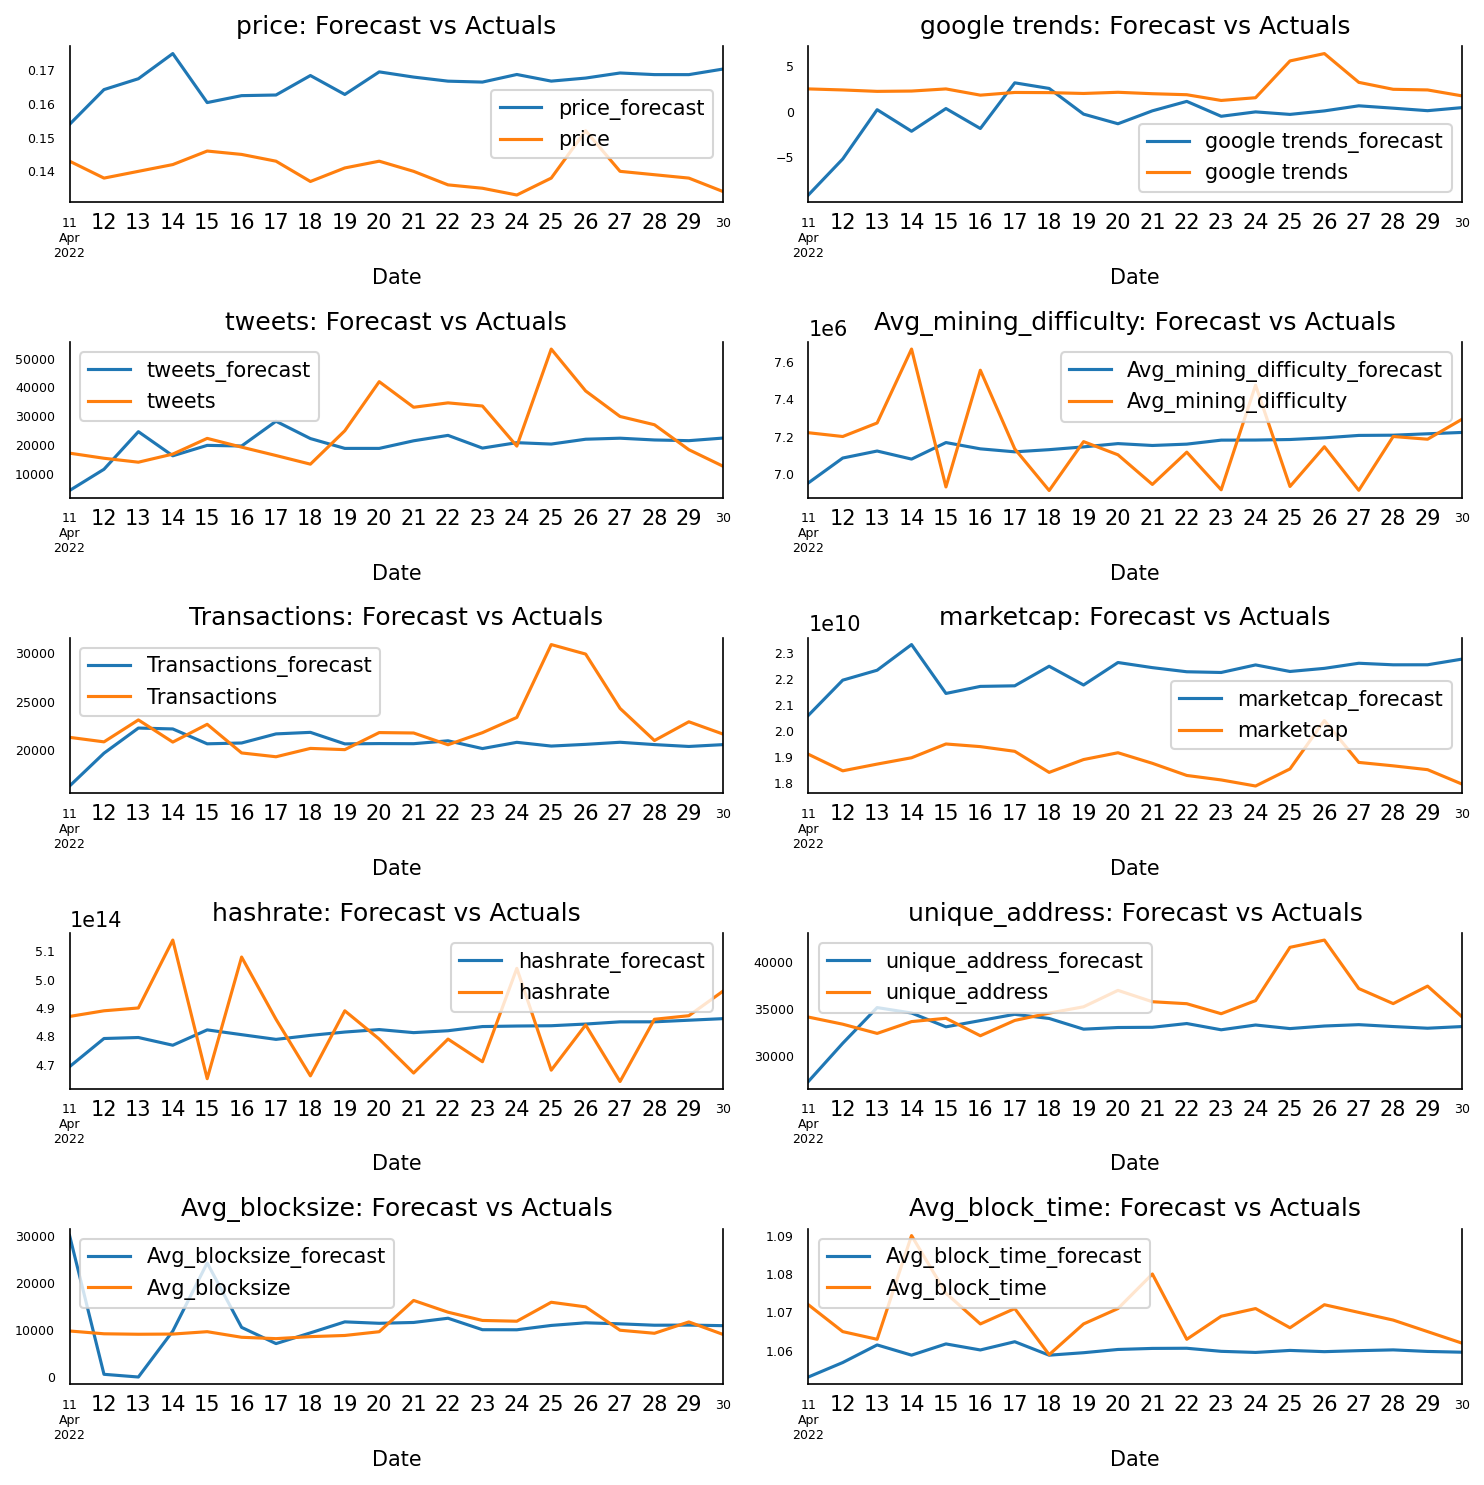

In [130]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [128]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: price')
accuracy_prod = forecast_accuracy(df_results['price_forecast'].values, df_test['price'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: google trends')
accuracy_prod = forecast_accuracy(df_results['google trends_forecast'].values, df_test['google trends'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: tweets')
accuracy_prod = forecast_accuracy(df_results['tweets_forecast'].values, df_test['tweets'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Avg_mining_difficulty')
accuracy_prod = forecast_accuracy(df_results['Avg_mining_difficulty_forecast'].values, df_test['Avg_mining_difficulty'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Transactions')
accuracy_prod = forecast_accuracy(df_results['Transactions_forecast'].values, df_test['Transactions'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: marketcap')
accuracy_prod = forecast_accuracy(df_results['marketcap_forecast'].values, df_test['marketcap'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: hashrate')
accuracy_prod = forecast_accuracy(df_results['hashrate_forecast'].values, df_test['hashrate'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: unique_address')
accuracy_prod = forecast_accuracy(df_results['unique_address_forecast'].values, df_test['unique_address'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
print('\nForecast Accuracy of: Avg_blocksize')
accuracy_prod = forecast_accuracy(df_results['Avg_blocksize_forecast'].values, df_test['Avg_blocksize'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
print('\nForecast Accuracy of: Avg_block_time')
accuracy_prod = forecast_accuracy(df_results['Avg_block_time_forecast'].values, df_test['Avg_block_time'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
print('\nForecast Accuracy of: mining_profitability')
accuracy_prod = forecast_accuracy(df_results['mining_profitability_forecast'].values, df_test['mining_profitability'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: price
mape :  0.1881
me :  0.0262
mae :  0.0262
mpe :  0.1881
rmse :  0.0271
corr :  -0.3118
minmax :  0.1565

Forecast Accuracy of: google trends
mape :  1.3202
me :  -3.0821
mae :  3.2332
mpe :  -1.2475
rmse :  4.1885
corr :  0.0044
minmax :  1.3097

Forecast Accuracy of: tweets
mape :  0.3886
me :  -5175.0743
mae :  9777.5087
mpe :  -0.0685
rmse :  12543.7089
corr :  0.1067
minmax :  0.3245

Forecast Accuracy of: Avg_mining_difficulty
mape :  0.025
me :  -14461.8642
mae :  180515.1923
mpe :  -0.0011
rmse :  234331.9381
corr :  -0.2609
minmax :  0.0246

Forecast Accuracy of: Transactions
mape :  0.1028
me :  -1774.9184
mae :  2516.4561
mpe :  -0.0656
rmse :  3691.5196
corr :  -0.0465
minmax :  0.1014

Forecast Accuracy of: marketcap
mape :  0.1837
me :  3428527312.1366
mae :  3428527312.1366
mpe :  0.1837
rmse :  3547516204.6853
corr :  -0.3018
minmax :  0.1535

Forecast Accuracy of: hashrate
mape :  0.0259
me :  -2408765423568.072
mae :  12578619821953.053
mpe 

/var/folders/22/yxp4zydx0fv4vzj98bjb5czr0000gn/T/ipykernel_41514/3381761088.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/var/folders/22/yxp4zydx0fv4vzj98bjb5czr0000gn/T/ipykernel_41514/3381761088.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


mape :  0.0834
me :  -2482.8772
mae :  3077.476
mpe :  -0.0652
rmse :  3928.9978
corr :  -0.0369
minmax :  0.0829

Forecast Accuracy of: Avg_blocksize
mape :  0.4225
me :  530.6092
mae :  4297.2224
mpe :  0.0848
rmse :  6644.2474
corr :  0.0751
minmax :  0.2932

Forecast Accuracy of: Avg_block_time
mape :  0.0089
me :  -0.0096
mae :  0.0096
mpe :  -0.0089
rmse :  0.0119
corr :  -0.0286
minmax :  0.0089

Forecast Accuracy of: mining_profitability
mape :  0.2747
me :  1.064
mae :  1.064
mpe :  0.2747
rmse :  1.0951
corr :  -0.4257
minmax :  0.2126
